In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('DTP_DATA_CORRECT.csv')
df = df.drop('Unnamed: 0', axis=1)
print(df.shape)
features_number = df.shape[1]
df.head(5)

C:\Users\Настя\AppData\Local\Temp\ipykernel_7536\1562921182.py:1: DtypeWarning: Columns (6,7,28,38,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DTP_DATA_CORRECT.csv')


(1400915, 89)


,DTPV,date,district,EMTP_NUMBER,CHOM,COORD_L,COORD_W,dor,dor_k,dor_z,...,any cyclists,any concomitant traffic violations,any injuries without safety belt,any child restraints,number of guilty objects,fatal traffic violation(s),number of fatal traffic violations,bodily harm,guilty drivers' average experience,drivers' average experience
0,Столкновение,31.01.2015,ЖЕЛЕЗНОДОРОЖНЫЙ,NaN,Движение частично перекрыто,83.740833,53.333056,NaN,NaN,Не указано,...,0,0,0,0,1,{'Другие нарушения ПДД водителем'},1,"{'Раненый, находящийся (находившийся) на амбу...",15.0,13.0
1,Наезд на пешехода,31.01.2015,АЛЕЙСКИЙ,NaN,Режим движения не изменялся,82.462778,52.245833,А-322 Барнаул - Рубцовск - граница с Республик...,3.0,Федеральная (дорога федерального значения),...,0,1,0,0,1,{'Нахождение на проезжей части без цели её пер...,1,"{'Раненый, находящийся (находившийся) на стаци...",NaN,5.0
2,Наезд на пешехода,31.01.2015,ИНДУСТРИАЛЬНЫЙ,NaN,Движение частично перекрыто,83.501944,53.274167,NaN,NaN,Не указано,...,0,0,0,0,2,{'Переход через проезжую часть вне пешеходного...,1,"{'Раненый, находящийся (находившийся) на амбу...",NaN,17.0
3,Наезд на пешехода,31.01.2015,ЦЕНТРАЛЬНЫЙ,NaN,Режим движения не изменялся,83.251667,53.285278,NaN,NaN,Не указано,...,0,0,0,0,1,{'Переход через проезжую часть вне пешеходного...,1,"{'Раненый, находящийся (находившийся) на амбу...",NaN,27.0
4,Наезд на пешехода,31.01.2015,ИНДУСТРИАЛЬНЫЙ,NaN,Движение частично перекрыто,83.708889,53.318333,NaN,NaN,Не указано,...,0,0,0,0,1,{'Переход через проезжую часть в неустановленн...,1,"{'Раненый, находящийся (находившийся) на стаци...",NaN,1.0


In [49]:
df.columns

Index(['DTPV', 'date', 'district', 'EMTP_NUMBER', 'CHOM', 'COORD_L', 'COORD_W',
       'dor', 'dor_k', 'dor_z', 'factor', 'house', 'k_ul', 'km', 'm', 'NP',
       'ndu', 'OBJ_DTP', 'osv', 's_dtp', 's_pch', 'sdor', 'spog', 'street',
       'color', 'f_sob', 'g_v', 'm_pov', 'm_ts', 'marka_ts', 'n_ts', 'o_pf',
       'r_rul', 't_n', 't_ts', 'ts_s', 'ALCO', 'INJURED_CARD_ID', 'k_UCH',
       'NPDD', 'n_UCH', 'POL', 'SAFETY_BELT', 'SOP_NPDD', 's_SEAT_GROUP',
       's_SM', 's_T', 'v_ST', 'KTS', 'KUCH', 'kartId', 'POG', 'RAN', 'rowNum',
       'time', 'any TV technical failures', 'any non-private vehicles',
       'any russian vehicles', 'any vehicles older than 1990',
       'any vehicles older than 2000', 'any vehicles older than 2010',
       'any white vehicles', 'any black vehicles', 'any colored vehicles',
       'any front-wheel-drive vehicles', 'any rear-wheel-drive vehicles',
       'any four-wheel-drive vehicles', 'any A-class vehicles',
       'any B-class vehicles', 'any C-class 

In [50]:
df = df.drop(['color', 'f_sob', 'g_v', 'm_pov', 'm_ts', 'marka_ts', 'n_ts', 'o_pf',
       'r_rul', 't_n', 't_ts', 'ts_s', 'ALCO', 'INJURED_CARD_ID', 'k_UCH',
       'NPDD', 'n_UCH', 'POL', 'SAFETY_BELT', 'SOP_NPDD', 's_SEAT_GROUP',
       's_SM', 's_T', 'v_ST'], axis=1)

# dropped features because they were accidentally included in the DataFrame; 
# they contain information about the last accident participant and the last vehicle in the XML

In [51]:
# just because i didn't think ahead

new_column_names = {
    "guilty drivers' average experience": "guilty drivers average experience",
    "drivers' average experience": "drivers average experience"
}

df = df.rename(columns=new_column_names)

In [52]:
df.columns

Index(['DTPV', 'date', 'district', 'EMTP_NUMBER', 'CHOM', 'COORD_L', 'COORD_W',
       'dor', 'dor_k', 'dor_z', 'factor', 'house', 'k_ul', 'km', 'm', 'NP',
       'ndu', 'OBJ_DTP', 'osv', 's_dtp', 's_pch', 'sdor', 'spog', 'street',
       'KTS', 'KUCH', 'kartId', 'POG', 'RAN', 'rowNum', 'time',
       'any TV technical failures', 'any non-private vehicles',
       'any russian vehicles', 'any vehicles older than 1990',
       'any vehicles older than 2000', 'any vehicles older than 2010',
       'any white vehicles', 'any black vehicles', 'any colored vehicles',
       'any front-wheel-drive vehicles', 'any rear-wheel-drive vehicles',
       'any four-wheel-drive vehicles', 'any A-class vehicles',
       'any B-class vehicles', 'any C-class vehicles', 'any D-class vehicles',
       'any E-class vehicles', 'any S-class vehicles', 'any non-car vehicles',
       'any drunk passengers', 'any drunk drivers', 'any female drivers',
       'any escaped participants', 'any pedestrians', 'any cy

In [53]:
df.shape

(1400915, 65)

### Meanings of columns

In [54]:
column_meanings = {
    'DTPV': 'RTA type',
    # 'date',
    # 'district',
    'EMTP_NUMBER': 'RTA number', # its meaning is similar to kartId
    'CHOM': 'info about changes in traffic',
    'dor': 'road name',
    'dor_k': 'road category',
    'dor_z': 'road significance',
    'factor': 'factors influencing the traffic',
    # 'house',
    'k_ul': 'street significance',
    'km': 'RTA road km',
    'm': 'RTA road m',
    'NP': 'human settlement',
    'ndu': 'defects of the road network transport and operational maintenance',
    'OBJ_DTP': 'road network objects near RTA',
    'osv': 'lighting',
    's_dtp': '', # dk what is it 
    's_pch': 'road surface condition',
    'sdor': 'road network objects at the scene of RTA',
    'spog': 'weather',
    # 'street',
    # -----------------------------------------------------------------------------
    # (info about every vehicle, was not save as column)
    'color': 'vehicle color',
    'f_sob': 'form of ownership', # it is not displayed in pdf version
    'g_v': 'vehicle year of release',
    'm_pov': 'vehicle damage place',
    'm_ts': 'vehicle model',
    'marka_ts': 'vehicle brand',
    'n_ts': 'vehicle number in RTA',
    'o_pf': 'form of ownership', # similar to f_sob in meaning, but has other values, f_sob was preferred it
    'r_rul': 'steering position',
    't_n': 'vehicle technical failure',
    't_ts': 'vehicle class',
    'ts_s': 'info about vehicle leaving a RTA place',
    # (info about every participant, was not save as column)
    'ALCO': 'ppm',
    'INJURED_CARD_ID': '', # dk what is it
    'k_UCH': 'participant category',
    'NPDD': 'direct traffic violations',
    'n_UCH': 'participant number',
    'POL': 'gender',
    'SAFETY_BELT': 'safety belt',
    'SOP_NPDD': 'concomitant traffic violations',
    's_SEAT_GROUP': 'type of child restraint',
    's_SM': 'info about participant leaving a RTA place',
    's_T': 'severity of the consequences',
    'v_ST': 'driving experience',
    # ---------------------------------------------------------------------
    # (general RTA info again)
    'KTS': 'number of vehicle in RTA',
    'KUCH': 'number of participants in RTA',
    'kartId': 'RTA ID', # it is not displayed in pdf version
    'POG': 'number of deaths',
    'RAN': 'number of wounded',
    # 'rowNum',
    # 'time'
}

## Processing the data gaps

In [55]:
features_with_gaps = df.columns[df.isna().any()].tolist()
print(features_with_gaps)

['EMTP_NUMBER', 'CHOM', 'COORD_L', 'COORD_W', 'dor', 'dor_k', 'house', 'k_ul', 'km', 'm', 'NP', 'street', 'guilty drivers average experience']


We don't need every feature, so let's create a list of columns to drop and update it as needed.

In [56]:
drop_columns = ['district', 'house', 'street', 'rowNum', 'km', 'm']
# will be dropped because they are irrelevant to our task

__EMTP_NUMBER vs kartId__: `kartId` was chosen as an accident ID

`kartId` does not appear in the PDF but is present in the XML and serves the same function as `EMTP_NUMBER`, so we need to choose between them.

In [57]:
print(f"EMTP_NUMBER gaps: {df['EMTP_NUMBER'].isna().sum()}")
print(f"kartId gaps: {df['kartId'].isna().sum()}")

# drop EMTP_NUMBER, it's fulled of nan

drop_columns.append('EMTP_NUMBER')

EMTP_NUMBER gaps: 823047
kartId gaps: 0


__CHOM__: 2 objects were dropped

In [58]:
print(f"CHOM gaps: {df['CHOM'].isna().sum()}")

df = df[df['CHOM'].notna()]
print(f"Objects left: {df.shape[0]}")

CHOM gaps: 2
Objects left: 1400913


__k_ul:__ replace nan by new value

In [60]:
print(f"k_ul gaps: {df['k_ul'].isna().sum()}")
print(f"street gaps: {df['street'].isna().sum()}")

# Can't try to fill the k_ul gaps by street values, cause the number of nan in street is much bigger.
# Replace nan by 'Назначение неизвестно'

df['k_ul'] = df['k_ul'].fillna('Назначение неизвестно')
print(f"k_ul gaps left: {df['k_ul'].isna().sum()}")

k_ul gaps: 120984
street gaps: 517069
k_ul gaps left: 0


__guilty drivers' average experience:__ 145498 objects were deleted

In [61]:
print(f"guilty drivers average experience gaps: {df['guilty drivers average experience'].isna().sum()}")

df = df[df['guilty drivers average experience'].notna()]
print(f"Objects left: {df.shape[0]}")

guilty drivers average experience gaps: 145859
Objects left: 1255054


### **dor, dor_k:** key features in our analysis

__dor and dor_k:__ 930.003 common gaps

Why `dor` is a key feature?
- contains road names
- will allow to identify accidents on toll roads (here you can find [the list of toll roads in Russia](https://avtodor-tr.ru/road/))
- so we can create binary key feature `toll road`

In [62]:
df['dor'].notna().sum()

447902

In [63]:
print(f"Gaps in dor: {df['dor'].isna().sum()}")
print(f"Gaps in dor_k: {df['dor_k'].isna().sum()}")

dor_ind = set(df[df['dor'].isna()]['kartId'])
dor_k_ind = set(df[df['dor_k'].isna()]['kartId'])
common_gaps = dor_ind | dor_k_ind

print(f"Dor and dor_k common gaps: {len(common_gaps)}")

Gaps in dor: 807152
Gaps in dor_k: 813752
Dor and dor_k common gaps: 818893


#### **Lyrical digression and NP:** why it is useless and will be deleted

In [64]:
print(f"NP gaps: {df['NP'].isna().sum()}")

NP gaps: 362018


`NP` contains only (compared to `dor`) 388.721 gaps and had a potential to be a key feature.

Why `NP` could be a key feature?
- the aim of the thesis is not only to analyze toll roads but also to compare them with free roads in Russia
- toll roads in Russia are mostly highways, which makes them very different from accidents occurring within cities (due to different conditions, speed limits, etc.)
- for a correct analysis, accidents that occurred in populated areas must be excluded from the DataFrame
- identifying these areas using NP could help achieve this

Why it is NOT?
- because the feature doesn't work tha way it should
- according to its intended meaning, `NP` should either: 

(1) contain names of populated areas with non-populated areas represented as NaN or 

(2) include names of populated areas and a clear label for non-populated areas (e.g., "not NP" or "highway")

- in reality, `NP` contains both names of populated areas and labels for non-populated areas, but these labels account for less than 0.2% of the non-NaN observations in `NP`
- as a result, the column primarily reflects the names of populated areas nearest to the accident location — even when the accident occurred on a highway
- this makes the feature completely useless for the analysis objectives, as it does not reliably distinguish between accidents in populated and non-populated areas

In [65]:
np_marks_list = [
    'г ', 'д ', 'п ', 'с ', 'х ', 'ст-ца ', 'аал ', 'аул ', 'массив ', 'мкр ', 
    'пгт ', 'починок ', 'сл ', 'ст ', 'поселение ', 'жилрайон ', 'городок ', 'заимка ', 'м ', 'у'
    ]           # compiled by the method of analyzing unique 'NP' feature values

non_missing_np = df[df['NP'].notna()]
not_np_unique = non_missing_np['NP'].unique().tolist()
not_np_unique = sorted(not_np_unique)

for np in not_np_unique[:]:
    for np_mark in np_marks_list:
        if np_mark in np:
            not_np_unique.remove(np)
            break

non_NP_obs = df[df['NP'].isin(not_np_unique)]
print(f"Number of observations without gaps in 'NP', where 'NP' values are not considered as populated areas: {non_NP_obs.shape[0]}")
print('-----')
print(' ')

# and if we try to find any highway in this DataFrame we'll fail:

dor_uniq = df['dor'].unique().tolist()
M_1_dors = list()

for dor in dor_uniq:
    try:
        if 'М-1 ' in dor and 'подъездная' not in dor and 'Подъездная' not in dor:
            M_1_dors.append(dor)
    except TypeError:
        continue

M1_df = non_NP_obs[non_NP_obs['dor'].isin(M_1_dors)]
print(f"M-1 highway found in non_NP_obs DataFrame: {M1_df.shape[0]}")
print('Spoiler: the number will be the same for every toll road')
print('-----')
print(' ')

# and in full DataFrame:

M1_df = df[df['dor'].isin(M_1_dors)]
print(f"M-1 highway found in full DataFrame: {M1_df.shape[0]}")
print('-----')
print(' ')

# analyzing the 'NP' values of M-1 toll road observations and finding out the 'NP' uselesness

print('The M-1 toll road unique NP values (M-1 road is a highway):')
M1_df[M1_df['NP'].notna()]['NP'].unique()

Number of observations without gaps in 'NP', where 'NP' values are not considered as populated areas: 1360
-----
 
M-1 highway found in non_NP_obs DataFrame: 0
Spoiler: the number will be the same for every toll road
-----
 
M-1 highway found in full DataFrame: 1546
-----
 
The M-1 toll road unique NP values (M-1 road is a highway):


array(['г Москва', 'г Кубинка', 'д Ляхово', 'с/п Новоивановское',
       'с/п Успенское', 'рп Новоивановское', 'д Барвиха', 'д Бутынь',
       'г Одинцово', 'г Клин', 'дп Лесной Городок', 'д Немчиново',
       'д Вырубово', 'с Жаворонки', 'д Красная Горка', 'д Каменка',
       'г Ярцево', 'д Анохово', 'г Гагарин'], dtype=object)

In [66]:
drop_columns.append('NP')

### How many observations of toll road accidents do we have without filling the gaps in 'dor'?

Here we can find [the list of toll roads in Russia](https://avtodor-tr.ru/road/). It contains:
- М-1 "Беларусь"
- М-3 "Украина"
- М-4 "Дон"
- М-11 "Нева"
- М-12 "Восток"
- А-113 ЦКАД

In [67]:
dor_uniq = df['dor'].unique().tolist()

russian_toll_roads = ['М-1 ', 'М-3 ', 'М-4 ', 'М-11 ', 'М-12 ']
toll_road_names = list()

for dor in dor_uniq:
    for toll_road in russian_toll_roads:
        try:
            if toll_road in dor and 'подъездная' not in dor.lower():
                toll_road_names.append(dor)
                break
        except TypeError:
            continue

# print(len(toll_road_names))

toll_roads_df = df[df['dor'].isin(toll_road_names)]
print(f"Number of observations of toll road accidents: {toll_roads_df.shape[0]}")
print('-----')
toll_roads_df.head()

Number of observations of toll road accidents: 28376
-----


,DTPV,date,district,EMTP_NUMBER,CHOM,COORD_L,COORD_W,dor,dor_k,dor_z,...,any cyclists,any concomitant traffic violations,any injuries without safety belt,any child restraints,number of guilty objects,fatal traffic violation(s),number of fatal traffic violations,bodily harm,guilty drivers average experience,drivers average experience
25764,Столкновение,27.01.2015,КОРЕНОВСКИЙ,NaN,Движение частично перекрыто,39.915886,45.30323,М-4 Дон Москва - Воронеж - Ростов-на-Дону - Кр...,1.0,Федеральная (дорога федерального значения),...,0,0,0,0,1,{'Выезд на полосу встречного движения'},1,"{'Раненый, находящийся (находившийся) на амбу...",16.0,24.0
25788,Опрокидывание,25.01.2015,ПАВЛОВСКИЙ,NaN,Режим движения не изменялся,39.701389,45.891944,М-4 Дон Москва - Воронеж - Ростов-на-Дону - Кр...,1.0,Федеральная (дорога федерального значения),...,0,0,0,0,1,{'Нарушение правил перестроения'},1,"{'Раненый, находящийся (находившийся) на стаци...",13.0,13.0
25829,Столкновение,22.01.2015,АРМАВИР (РАЙОН),NaN,Движение частично перекрыто,41.07822,44.55451,Р-217 Кавказ автомобильная дорога М-4 Дон - Вл...,1.0,Федеральная (дорога федерального значения),...,0,1,0,0,1,{'Несоблюдение очередности проезда'},1,"{'Раненый, находящийся (находившийся) на стаци...",17.0,13.5
25835,Опрокидывание,22.01.2015,ГЕЛЕНДЖИК (РАЙОН),NaN,Режим движения не изменялся,38.1633,44.3146,М-4 Дон Москва - Воронеж - Ростов-на-Дону - Кр...,3.0,Федеральная (дорога федерального значения),...,0,1,0,0,1,{'Несоответствие скорости конкретным условиям ...,1,"{'Раненый, находящийся (находившийся) на амбу...",27.0,27.0
25846,Столкновение,22.01.2015,ТИХОРЕЦКИЙ,NaN,Движение частично перекрыто,40.22636,45.37034,Р-217 Кавказ автомобильная дорога М-4 Дон - Вл...,2.0,Федеральная (дорога федерального значения),...,0,0,0,0,1,{'Нарушение правил перестроения'},1,"{'Раненый, находящийся (находившийся) на амбу...",3.0,20.5


This should be generally enough for analysis, but we have the coordinates (`COORD_L`, `COORD_W`), so we can try to fill in the gaps and increase our sample.

### __COORD_L and COORD_W:__ filling the 'dor' gaps

Begin with analyzing columns gaps: 15 objects were dropped

In [68]:
L_ind = set(df[df['COORD_L'].isna()]['kartId'])
W_ind = set(df[df['COORD_W'].isna()]['kartId'])
common_gaps = L_ind | W_ind

print(f"COORD_L gaps: {df['COORD_L'].isna().sum()}")
print(f"COORD_W gaps: {df['COORD_W'].isna().sum()}")
print(f"COORD_L and COORD_W common gaps: {len(common_gaps)}")

df = df[(df['COORD_L'].notna()) & (df['COORD_W'].notna())]
print(f"Objects left: {df.shape[0]}")

COORD_L gaps: 14
COORD_W gaps: 8
COORD_L and COORD_W common gaps: 15
Objects left: 1255039


#### Let's look at the distribution of omissions of the "road" feature by year

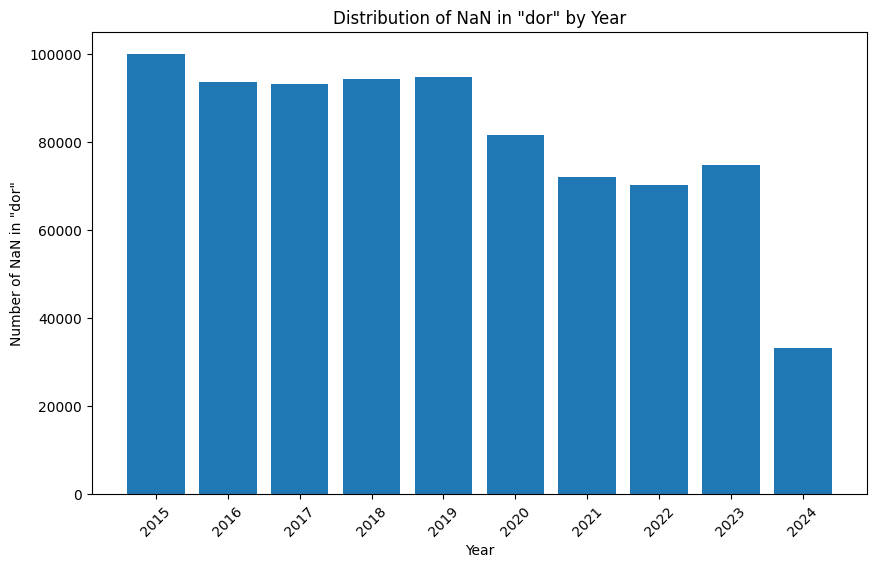

In [69]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y', errors='coerce')
df['year'] = df['date'].dt.year

nan_distribution = df[df['dor'].isna()].groupby('year').size()

plt.figure(figsize=(10, 6))
plt.bar(nan_distribution.index, nan_distribution.values)
plt.xlabel('Year')
plt.ylabel('Number of NaN in "dor"')
plt.title('Distribution of NaN in "dor" by Year')
plt.xticks(nan_distribution.index, rotation=45)
plt.show()

The number of NaN does not differ much from year to year, although there is a downward trend at the moment, there are no outliers.

#### How to retrieve the accident address using coordinates?

Let's select an observation with a known answer to test the methods.

In [70]:
toll_roads_df[toll_roads_df['NP'].notna()]['kartId']

26218      163227730
26469      165244144
26552      164824676
26574      164696383
27120      166265664
             ...    
1360261    223380249
1360271    223498890
1360302    223603661
1360317    223721869
1360327    223922221
Name: kartId, Length: 4431, dtype: int64

In [71]:
obs = toll_roads_df[toll_roads_df['kartId'] == 223380249][['kartId', 'COORD_L', 'COORD_W', 'dor', 'NP', 'district']]
obs

,kartId,COORD_L,COORD_W,dor,NP,district
1360261,223380249,45.406001,43.231556,Р-217 Кавказ автомобильная дорога М-4 Дон - Вл...,с Шаами-Юрт,Ачхой-Мартановский


In [72]:
float(obs['COORD_L'].values[0])

45.406001

In [73]:
from geopy.geocoders import Photon
geolocator = Photon(user_agent="my_photon_app")

latitude = float(obs['COORD_W'].values[0])    # COORD_W
longitude = float(obs['COORD_L'].values[0])     # COORD_L

# reverse geocoding
try:
    location = geolocator.reverse((latitude, longitude))
    print(f"Адрес: {location.address}")
except Exception as e:
    print(f"Ошибка: {e}")

Адрес: улица Ю. Гагарина, Шаами-Юрт, Чечня, Россия


In [74]:
try:
    location = geolocator.reverse((latitude, longitude))
    if location:
        raw_data = location.raw
        road_name = raw_data.get('road', 'Название дороги не найдено')
        print(f"Название дороги: {road_name}")
    else:
        print("Не удалось найти местоположение.")
except Exception as e:
    print(f"Ошибка: {e}")

Название дороги: Название дороги не найдено


In [75]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_nominatim_app")

latitude = float(obs['COORD_W'].values[0])    # COORD_W
longitude = float(obs['COORD_L'].values[0])   # COORD_L

try:
    location = geolocator.reverse((latitude, longitude), language='ru')
    if location:
        road_name = location.raw.get('address', {}).get('road', 'Название дороги не найдено')
        print(f"Название дороги: {road_name}")
    else:
        print("Не удалось найти местоположение.")
except Exception as e:
    print(f"Ошибка: {e}")

Название дороги: улица С. Лорсанова


## Rename and drop the columns

In [76]:
df = df.drop(drop_columns, axis=1)

print(f"Features left: {df.shape[1]}, in the begining was: {features_number}")

Features left: 58, in the begining was: 89


In [77]:
new_column_names = {
    'DTPV': 'RTA type',
    'kartId': 'RTA number',
    'CHOM': 'traffic changes info',
    'dor_z': 'road significance',
    'factor': 'factors influenced traffic',
    'k_ul': 'street significance',
    'km': 'RTA road km',
    'm': 'RTA road m',
    'ndu': 'road network maintenance defects',
    'OBJ_DTP': 'RTA-adjacent road objects',
    'osv': 'lighting',
    's_pch': 'road surface condition',
    'sdor': 'RTA site road objects',
    'spog': 'weather',
    'KTS': 'RTA vehicle number',
    'KUCH': 'RTA participants number',
    'POG': 'number of deaths',
    'RAN': 'number of wounded',
    'time': 'RTA time'
}

df = df.rename(columns=new_column_names)

In [33]:
df.columns

Index(['RTA type', 'date', 'traffic changes info', 'COORD_L', 'COORD_W', 'dor',
       'dor_k', 'road significance', 'factors influenced traffic',
       'street significance', 'road network maintenance defects',
       'RTA-adjacent road objects', 'lighting', 's_dtp',
       'road surface condition', 'RTA site road objects', 'weather',
       'RTA vehicle number', 'RTA participants number', 'RTA number',
       'number of deaths', 'number of wounded', 'RTA time',
       'any TV technical failures', 'any non-private vehicles',
       'any russian vehicles', 'any vehicles older than 1990',
       'any vehicles older than 2000', 'any vehicles older than 2010',
       'any white vehicles', 'any black vehicles', 'any colored vehicles',
       'any front-wheel-drive vehicles', 'any rear-wheel-drive vehicles',
       'any four-wheel-drive vehicles', 'any A-class vehicles',
       'any B-class vehicles', 'any C-class vehicles', 'any D-class vehicles',
       'any E-class vehicles', 'any S-cla

In [78]:
df.to_csv('DTP_DATA_CORRECT_PROCESSED.csv')

#### _Drafts_

In [35]:
# ts_uch_columns = ['ALCO', 'k_UCH', 'NPDD', 'n_UCH', 'POL', 'SAFETY_BELT', 'SOP_NPDD', 's_SEAT_GROUP', 's_SM', 's_T', 'v_ST']
# ts_info_columns = ['color', 'g_v', 'm_pov', 'm_ts', 'marka_ts', 'n_ts', 'o_pf', 'r_rul', 't_n', 't_ts', 'ts_s']


# for name in ts_uch_columns:
#     for column in columns:
#         if name in column:
#             df1 = df1.rename(columns={column: column.replace(name, column_meanings[name])})

# for name in ts_info_columns:
#     for column in columns:
#         if name in column:
#             df1 = df1.rename(columns={column: column.replace(name, column_meanings[name])})

In [36]:
# dor_uniq = df['dor'].unique().tolist()
# M_1_dors = list()

# for dor in dor_uniq:
#     try:
#         if 'М-1 ' in dor and 'подъездная' not in dor and 'Подъездная' not in dor:
#             M_1_dors.append(dor)
#     except TypeError:
#         continue

# print(M_1_dors)
# print(len(M_1_dors))

# number = 0
# for M_1 in M_1_dors:
#     number += df[df['dor'] == M_1].shape[0]
# print(number)